In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Preparing Data

In [84]:
Atheltes = pd.read_csv("collegiate_athlete_injury_dataset.csv")
Atheltes.head()

,Athlete_ID,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,Injury_Indicator
0,A001,24,Female,195,99,Center,2,13,2,3,1,1,99,58,100,0
1,A002,21,Male,192,65,Forward,8,14,1,3,1,4,55,63,83,0
2,A003,22,Male,163,83,Guard,8,8,2,1,3,6,58,62,100,0
3,A004,24,Female,192,90,Guard,1,13,1,1,1,7,82,74,78,0
4,A005,20,Female,173,79,Center,3,9,1,2,1,2,90,51,83,0


### Handling nulls

In [85]:
Atheltes.isnull().sum()   # no nulls

Athlete_ID                  0
Age                         0
Gender                      0
Height_cm                   0
Weight_kg                   0
Position                    0
Training_Intensity          0
Training_Hours_Per_Week     0
Recovery_Days_Per_Week      0
Match_Count_Per_Week        0
Rest_Between_Events_Days    0
Fatigue_Score               0
Performance_Score           0
Team_Contribution_Score     0
Load_Balance_Score          0
Injury_Indicator            0
dtype: int64

### Feature Engineering

In [86]:
# maybe the weight and height isn't usefull enough --> maybe BMI is more indicative
Atheltes["BMI"] = Atheltes["Weight_kg"] / (Atheltes["Height_cm"]/100)**2

In [87]:
# training density 
Atheltes["Training_Intense"] = Atheltes["Training_Intensity"] * Atheltes["Training_Hours_Per_Week"]

In [88]:
# Recovery and Rest program
Atheltes["Recovery_per_Match"] = Atheltes["Recovery_Days_Per_Week"]/ Atheltes["Match_Count_Per_Week"] 
Atheltes["Rest_per_Match"] = Atheltes["Rest_Between_Events_Days"]/ Atheltes["Match_Count_Per_Week"] 
work =  Atheltes["Training_Intensity"] * (Atheltes["Training_Hours_Per_Week"]/24) + Atheltes["Match_Count_Per_Week"]
rest = Atheltes["Rest_Between_Events_Days"] +  Atheltes["Recovery_Days_Per_Week"]
Atheltes["Work_to_Rest"] = ( work / rest  )

In [89]:
Atheltes.head()

,Athlete_ID,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,...,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,Injury_Indicator,BMI,Training_Intense,Recovery_per_Match,Rest_per_Match,Work_to_Rest
0,A001,24,Female,195,99,Center,2,13,2,3,...,1,99,58,100,0,26.035503,26,0.666667,0.333333,1.361111
1,A002,21,Male,192,65,Forward,8,14,1,3,...,4,55,63,83,0,17.632378,112,0.333333,0.333333,3.833333
2,A003,22,Male,163,83,Guard,8,8,2,1,...,6,58,62,100,0,31.239414,64,2.000000,3.000000,0.733333
3,A004,24,Female,192,90,Guard,1,13,1,1,...,7,82,74,78,0,24.414062,13,1.000000,1.000000,0.770833
4,A005,20,Female,173,79,Center,3,9,1,2,...,2,90,51,83,0,26.395803,27,0.500000,0.500000,1.562500


# Data Understading 

In [95]:
Atheltes.describe()

,Age,Height_cm,Weight_kg,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,Injury_Indicator,BMI,Training_Intense,Recovery_per_Match,Rest_per_Match,Work_to_Rest
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,21.170000,180.805000,77.475000,5.10500,11.315000,1.985000,2.385000,1.975000,4.920000,74.465000,72.630000,93.395000,0.070000,23.988031,57.540000,1.104167,1.121250,1.329208
std,2.002787,11.529598,12.440789,2.49904,4.438952,0.811212,1.154748,0.817137,2.560543,14.636939,14.432762,8.660485,0.255787,5.016451,38.561553,0.796539,0.837044,0.713935
min,18.000000,160.000000,55.000000,1.00000,5.000000,1.000000,1.000000,1.000000,1.000000,50.000000,50.000000,62.000000,0.000000,15.097876,5.000000,0.250000,0.250000,0.236111
25%,19.000000,171.000000,67.000000,3.00000,7.000000,1.000000,1.000000,1.000000,3.000000,62.000000,60.750000,89.000000,0.000000,20.076427,27.000000,0.500000,0.500000,0.797917
50%,21.000000,182.500000,77.500000,5.00000,11.000000,2.000000,2.000000,2.000000,5.000000,74.000000,72.000000,98.000000,0.000000,23.548456,49.500000,1.000000,1.000000,1.166667
75%,23.000000,191.000000,89.000000,7.00000,15.000000,3.000000,3.000000,3.000000,7.000000,86.250000,85.000000,100.000000,0.000000,27.091318,80.000000,1.500000,1.500000,1.671875
max,24.000000,199.000000,99.000000,9.00000,19.000000,3.000000,4.000000,3.000000,9.000000,99.000000,99.000000,100.000000,1.000000,38.671875,171.000000,3.000000,3.000000,3.833333


<Axes: xlabel='Age', ylabel='Count'>

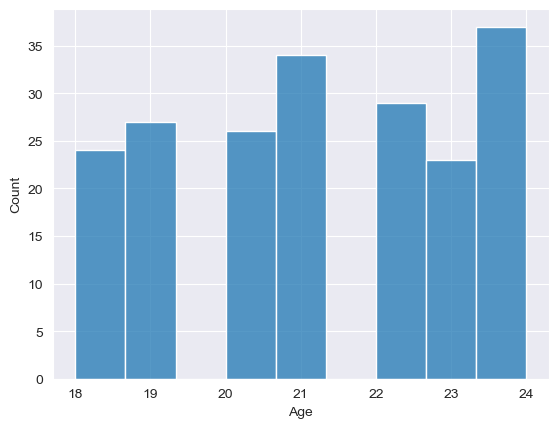

In [177]:
sns.histplot(Atheltes["Age"])

# Factors Affecting Injury vulnerability

## Gender

Don't reject H0 -> Both genders are equally likely to get injuried


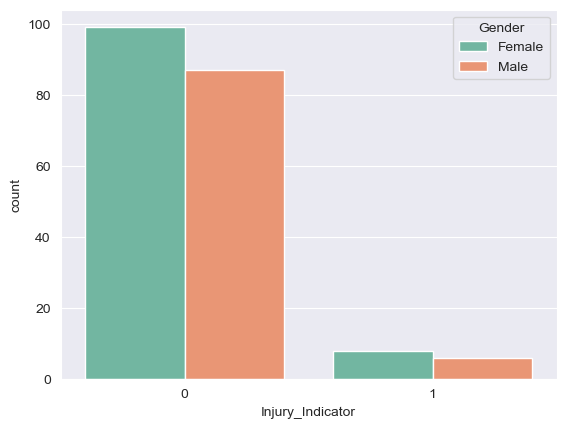

In [127]:
from statsmodels.stats.proportion import proportions_ztest
Males = Atheltes[Atheltes["Gender"]=="Male"]["Injury_Indicator"]
Females = Atheltes[Atheltes["Gender"]=="Female"]["Injury_Indicator"]
zstat , pval = proportions_ztest([Males.sum(),Females.sum()] , [Males.count(),Females.count()])
if pval < 0.05 :
    print ("Reject H0 -> Gender has association on probability of being injuried")
else :
    print ("Don't reject H0 -> Both genders are equally likely to get injuried")
sns.countplot(x="Injury_Indicator" , hue = "Gender" , data= Atheltes , palette= "Set2")
plt.show()

## Position

Don't reject H0 -> Each Position are equally likely to get injuried


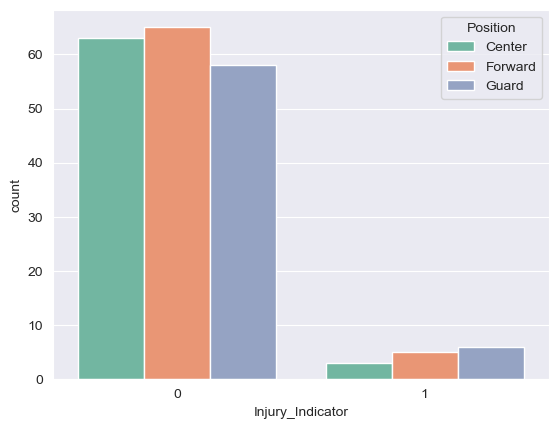

In [135]:
from scipy.stats import chi2_contingency 
contingency = pd.crosstab(Atheltes["Position"] , Atheltes["Injury_Indicator"])
chi_val , pval , df , expected = chi2_contingency(contingency)
if pval < 0.05 :
    print ("Reject H0 -> Position has statictical association on probability of being injuried")
else :
    print ("Don't reject H0 -> Each Position are equally likely to get injuried")
sns.countplot(x="Injury_Indicator" , hue = "Position" , data= Atheltes , palette= "Set2")
plt.show()

## numerical Relations

In [140]:
Atheltes.columns

Index(['Athlete_ID', 'Age', 'Gender', 'Height_cm', 'Weight_kg', 'Position',
       'Training_Intensity', 'Training_Hours_Per_Week',
       'Recovery_Days_Per_Week', 'Match_Count_Per_Week',
       'Rest_Between_Events_Days', 'Fatigue_Score', 'Performance_Score',
       'Team_Contribution_Score', 'Load_Balance_Score', 'Injury_Indicator',
       'BMI', 'Training_Intense', 'Recovery_per_Match', 'Rest_per_Match',
       'Work_to_Rest'],
      dtype='object')

In [160]:
Numeric = Atheltes[ [#'Athlete_ID',
 'Age', 
#'Gender', 
'Height_cm', 'Weight_kg','BMI', 
#'Position',
'Match_Count_Per_Week',
'Training_Hours_Per_Week','Training_Intensity', 'Training_Intense',
'Recovery_Days_Per_Week', 'Recovery_per_Match',
'Rest_Between_Events_Days', 'Rest_per_Match',
'Work_to_Rest','Load_Balance_Score',
'Fatigue_Score','Performance_Score', 'Team_Contribution_Score' , 
]]


In [187]:
from scipy.stats import ttest_ind, norm
import numpy as np


not_injured = Atheltes[Atheltes["Injury_Indicator"] == 0]
injured = Atheltes[Atheltes["Injury_Indicator"] == 1]

for col in Numeric:
    tstat, pval = ttest_ind(not_injured[col], injured[col], equal_var=False, nan_policy='omit')
    if pval < 0.05 :
        print(f"Reject H0 -> {col} Has statistically significant association to Injuries Probability")
        d = pg.compute_effsize(not_injured[col], 
                       injured[col], 
                       eftype='cohen')
        print(f"Cohen's of {col} {d:.2f}")
        ps = norm.cdf(np.abs(d)/ np.sqrt(2))*100
        if d > 0 :
            print (f"having More {col} will prevent you from getting injury at a percent of {ps:.2f}%")
        else :
            print (f"having Less {col} will prevent you from getting injury at a percent of {ps:.2f}%")
        print(f"\n{100*'-'}")
            


Reject H0 -> Recovery_Days_Per_Week Has statistically significant association to Injuries Probability
Cohen's of Recovery_Days_Per_Week 1.06
having More Recovery_Days_Per_Week will prevent you from getting injury at a percent of 77.23%

----------------------------------------------------------------------------------------------------
Reject H0 -> Work_to_Rest Has statistically significant association to Injuries Probability
Cohen's of Work_to_Rest -0.90
having Less Work_to_Rest will prevent you from getting injury at a percent of 73.87%

----------------------------------------------------------------------------------------------------
Reject H0 -> Load_Balance_Score Has statistically significant association to Injuries Probability
Cohen's of Load_Balance_Score 2.20
having More Load_Balance_Score will prevent you from getting injury at a percent of 94.00%

----------------------------------------------------------------------------------------------------
Reject H0 -> Fatigue_Score 

<Axes: >

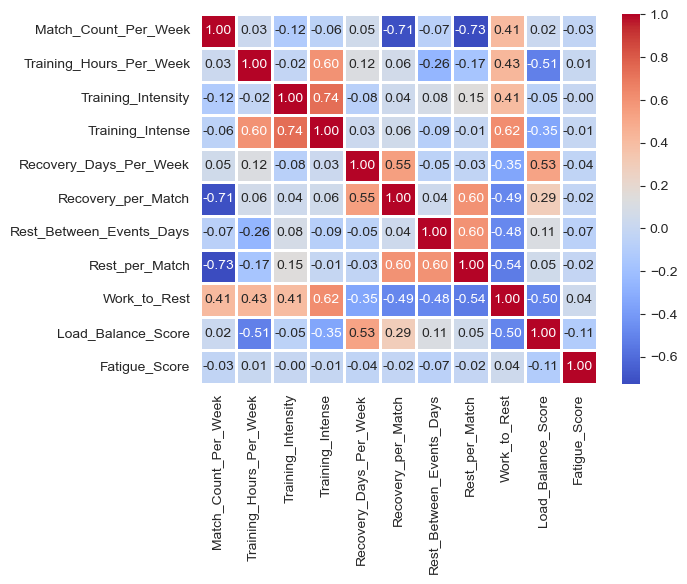

In [192]:
sns.heatmap(
Atheltes[[
'Match_Count_Per_Week',
'Training_Hours_Per_Week','Training_Intensity', 'Training_Intense',
'Recovery_Days_Per_Week', 'Recovery_per_Match',
'Rest_Between_Events_Days', 'Rest_per_Match',
'Work_to_Rest','Load_Balance_Score',
'Fatigue_Score'
]].corr()
,annot=True, cmap='coolwarm', fmt=".2f", linewidths=1

)

# Conclusion

- The analysis revealed that the number of matches played per week did not have a major influence on injury occurrence. Instead, the results indicate that recovery and load management factors played a far more significant role in preventing injuries.

- Specifically, both Recovery Days per Week and Load Balance Score showed strong negative associations with injury probability, suggesting that athletes who maintained higher recovery frequency and better workload balance were substantially less likely to get injured.

- On the other hand, variables such as Work-to-Rest Ratio and Fatigue Score further supported this finding, emphasizing that insufficient rest and elevated fatigue levels significantly increase injury risk.

- Moreover, a clear relationship was observed between increased fatigue symptoms and injury probability — suggesting that early signs of fatigue can serve as reliable indicators of potential injury risk.

- Overall, the study highlights that injury prevention depends more on effective recovery and workload balance programs than on the mere number of matches played, confirming that optimizing rest and recovery schedules is critical for athlete safety and long-term performance sustainability.

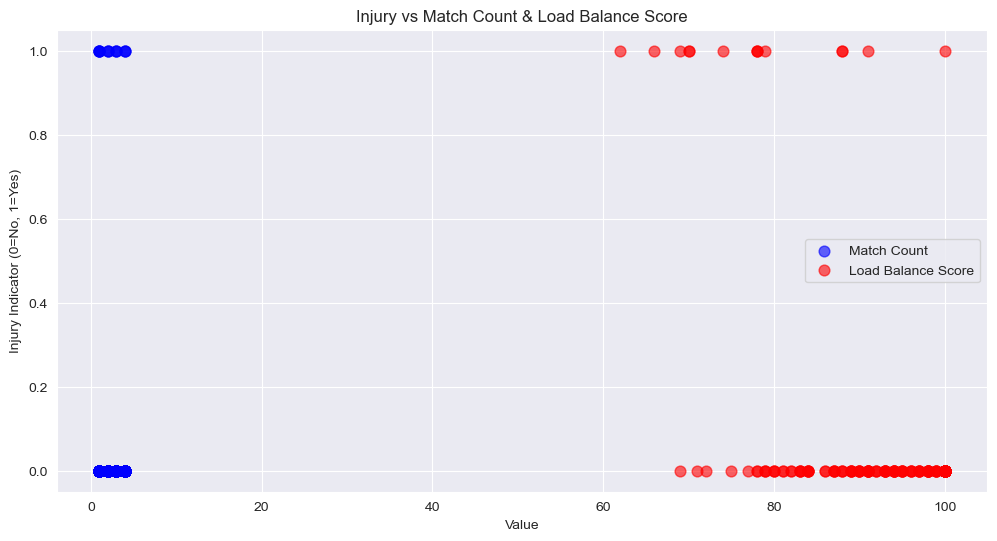

In [202]:
# "Match count doesn’t have much effect on injury probability, but athletes with low Load Balance are more prone to injuries."

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.scatter(Atheles['Match_Count_Per_Week'], 
            Atheles['Injury_Indicator'], 
            color='blue', label='Match Count', alpha=0.6, s=60)

plt.scatter(Atheles['Load_Balance_Score'], 
            Atheles['Injury_Indicator'], 
            color='red', label='Load Balance Score', alpha=0.6, s=60)

plt.xlabel('Value')
plt.ylabel('Injury Indicator (0=No, 1=Yes)')
plt.title('Injury vs Match Count & Load Balance Score')
plt.legend()
plt.grid(True)
plt.show()


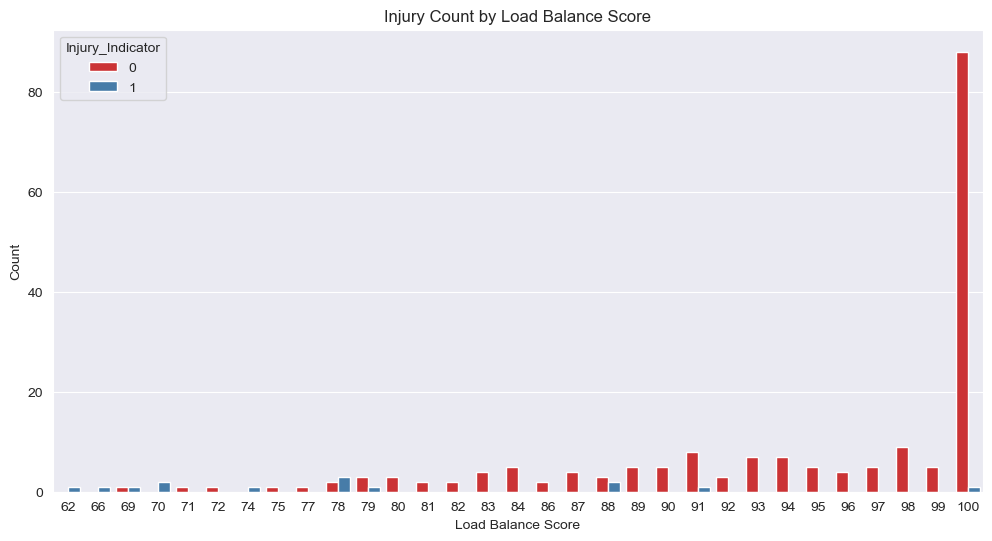

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

sns.countplot(x='Load_Balance_Score', hue='Injury_Indicator', 
              data=Atheles, palette='Set1')
plt.title('Injury Count by Load Balance Score')
plt.xlabel('Load Balance Score')
plt.ylabel('Count')
plt.show()


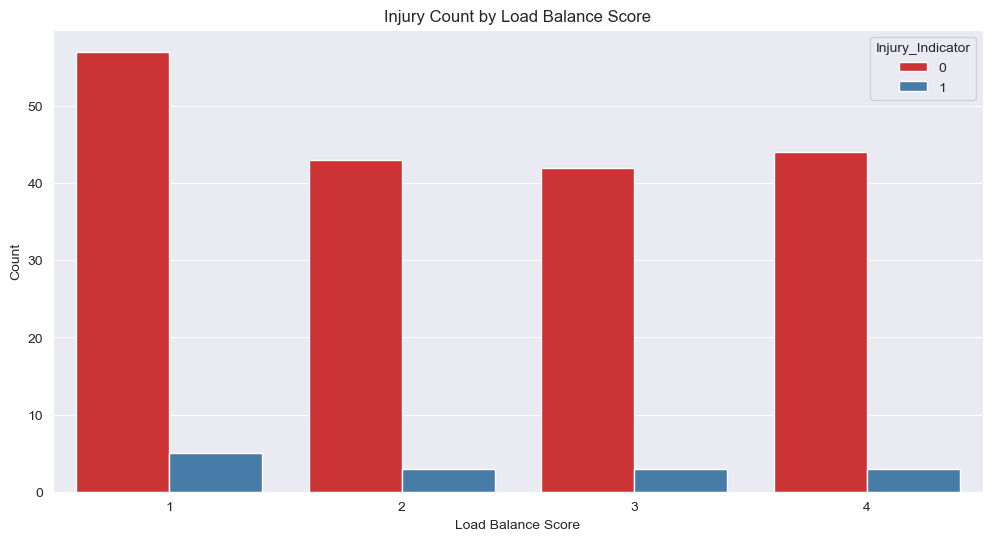

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

sns.countplot(x='Match_Count_Per_Week', hue='Injury_Indicator', 
              data=Atheles, palette='Set1')
plt.title('Injury Count by Load Balance Score')
plt.xlabel('Load Balance Score')
plt.ylabel('Count')
plt.show()
